<a href="https://colab.research.google.com/github/MarjAlmarez/githubTest/blob/main/GCash_Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv('gcash_coded.csv')

In [ ]:
# Check for and remove duplicates
df = df.drop_duplicates()

In [ ]:
# Reset the index
df = df.reset_index(drop=True)

In [ ]:
#Check the shape of the DataFrame
print(df.shape)

(15709, 46)


In [ ]:
# Select relevant columns for clustering
columns_for_clustering = ['Debit', 'Credit', 'Hour', 'Is_Weekend', 'Is_1st_to_3rd', 'Is_14th_to_16th', 'Is_Last_Three_Days']

In [ ]:
# Extract the relevant data
X = df[columns_for_clustering]

In [ ]:
# Handle missing values if any
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

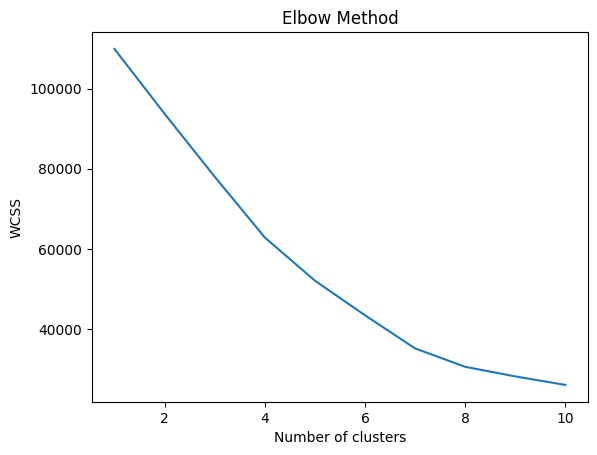

In [ ]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [ ]:
# Based on the Elbow Method, choose the optimal number of clusters
optimal_clusters = 9  # Adjust as needed

In [ ]:
# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# View the clustered data
print(df[['Description','Debit', 'Credit', 'Hour', 'Is_Weekend', 'Is_1st_to_3rd', 'Is_14th_to_16th', 'Is_Last_Three_Days', 'Cluster']])


                                             Description  Debit  Credit  Hour  \
0                                   Payment to Dragonpay  300.0     0.0   0.0   
1                                   Payment to Dragonpay   50.0     0.0   0.0   
2               Transfer from 09166573626 to 09501567919    0.0   220.0  18.0   
3      Payment to Food Panda Philippines Inc., Mercha...  216.0     0.0  18.0   
4               Transfer from 09567746080 to 09501567919    0.0   700.0  16.0   
...                                                  ...    ...     ...   ...   
15704  Withdraw from GSave Account with Reference No....    0.0   300.0  23.0   
15705  Transfer from 09158862472 to 09564160374 Withd...  535.0     0.0  23.0   
15706  Withdraw from GSave Account with Reference No....    0.0   500.0  17.0   
15707  Transfer from 09158862472 to 09564160374 Withd...  540.0     0.0  17.0   
15708  Withdraw from GSave Account with Reference No....    0.0  1500.0   5.0   

       Is_Weekend  Is_1st_t

In [ ]:
cluster_sums = df.groupby('Cluster').sum()
print(cluster_sums)

              Debit      Credit       Year    Month      Day  Week_of_Month  \
Cluster                                                                       
0              0.00  4823874.92   655232.0   2027.0   4896.0          890.0   
1        1319400.12  1144417.53  3415372.0  10897.0  25363.0         5067.0   
2        1762074.58  1329189.03  6246457.0  20015.0  47560.0         8304.0   
3        1107780.79   885702.35  3007061.0   9892.0   2910.0         1487.0   
4        1162649.35   988625.96  3273869.0  10255.0  47635.0         8004.0   
5        2510456.24  1972225.30  8100769.0  25173.0  62616.0        10967.0   
6        2028916.90  1575236.34  6199842.0  19754.0  47413.0         8332.0   
7        4245018.69        0.00   418632.0   1400.0   3014.0          558.0   
8              0.00  1827001.26    82924.0    298.0    532.0          102.0   

         Week_of_Year  Is_Weekend     Hour  Is_1st_to_3rd  ...  Week_4  \
Cluster                                                 

<ipython-input-18-86c23c8dc290>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_sums = df.groupby('Cluster').sum()


In [ ]:
cluster_mean = df.groupby('Cluster').mean()
print(cluster_mean)

                Debit        Credit         Year     Month        Day  \
Cluster                                                                 
0            0.000000  14888.502840  2022.320988  6.256173  15.111111   
1          781.172362    677.571066  2022.126702  6.451747  15.016578   
2          570.435280    430.297517  2022.161541  6.479443  15.396568   
3          744.976994    595.630363  2022.233356  6.652320   1.956960   
4          718.128073    610.639876  2022.155034  6.334157  29.422483   
5          626.674049    492.317848  2022.159011  6.283824  15.630554   
6          661.747195    513.775714  2022.127202  6.442922  15.464123   
7        20507.336667      0.000000  2022.376812  6.763285  14.560386   
8            0.000000  44561.006341  2022.536585  7.268293  12.975610   

         Week_of_Month  Week_of_Year  Is_Weekend       Hour  Is_1st_to_3rd  \
Cluster                                                                      
0             2.746914     25.129630    

<ipython-input-19-5b878f7920ae>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_mean = df.groupby('Cluster').mean()


In [ ]:
print(df['Cluster'].value_counts())

5    4187
2    3089
6    3066
1    1689
4    1619
3    1487
0     324
7     207
8      41
Name: Cluster, dtype: int64
